# Preparação do ambiente

## Importando bibliotecas e bases

In [493]:
import pandas as pd
import numpy as np
import seaborn as sb
from unidecode import unidecode
import matplotlib.pyplot as plt

In [494]:
v = pd.read_csv("../../data/processed/V.csv")
v.drop(columns=["Unnamed: 0"], inplace=True)

v["passageiro_data_hora"] = pd.to_datetime(v["passageiro_data_hora"])
v["passageiro_hora_entrada"] = v["passageiro_data_hora"].dt.hour

In [495]:
fgr = pd.read_csv("../../data/processed/FGR.csv", decimal=",")
fgr.drop(columns=["Unnamed: 0"], inplace=True)

In [496]:
paradas = pd.read_csv("../../data/processed/paradas.csv")
rota_paradas = pd.read_csv("../../data/processed/rota_paradas.csv")
rotas = pd.read_csv("../../data/processed/rotas.csv")

In [497]:
dados_bairros = pd.read_csv("../../data/processed/dados_bairros.csv")

## Gerando variavel demanda diaria por linha

In [498]:
demanda_p_linha_dia = v.groupby(["linha_numero", "movimento_diario_data_mov"]).count()["passageiro_matricula"].to_frame().reset_index()
demanda_p_linha_dia.rename(columns={"passageiro_matricula": "demanda_do_dia"}, inplace = True)

In [499]:
demanda_p_linha_dia.head()

linha_numero movimento_diario_data_mov  demanda_do_dia
0             1                2021-08-29             232
1             1                2021-08-31            9096
2             1                2021-09-01            8888
3             1                2021-09-02            8244
4             1                2021-09-03            9020

# Analise Mono

## FGR

In [500]:
fgr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17530 entries, 0 to 17529
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   fechamento_data                  17530 non-null  object 
 1   empresa_numero                   17530 non-null  int64  
 2   empresa_nome                     17530 non-null  object 
 3   linha_numero                     17530 non-null  int64  
 4   linha_nome                       17530 non-null  object 
 5   linha_km_programado              17530 non-null  float64
 6   linha_km_adotado                 17530 non-null  float64
 7   linha_eficiencia                 17530 non-null  float64
 8   passageiro_grupo                 17530 non-null  object 
 9   passageiro_demanda               17530 non-null  int64  
 10  passageiro_arrecadacao           17530 non-null  float64
 11  passageiro_arrecadacao_prevista  17530 non-null  float64
dtypes: float64(5), int

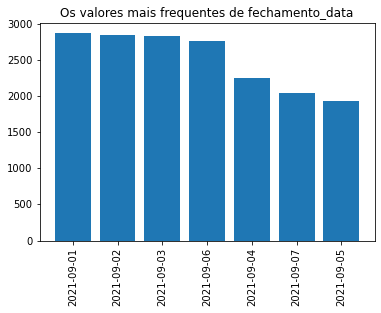

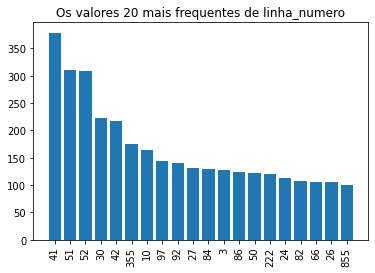

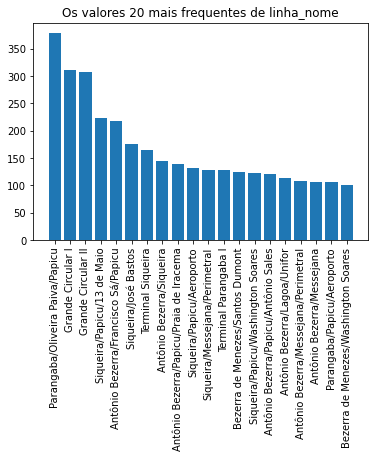

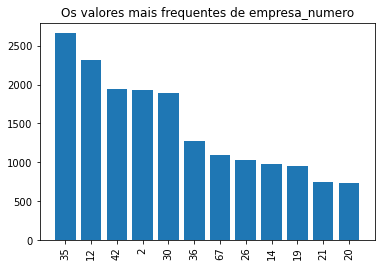

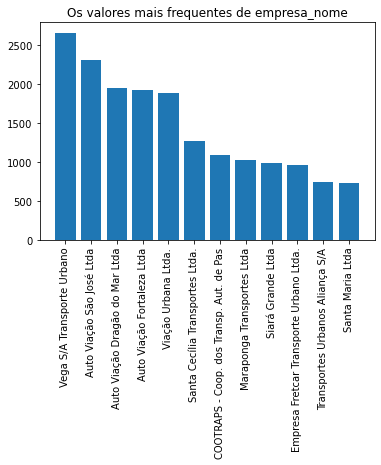

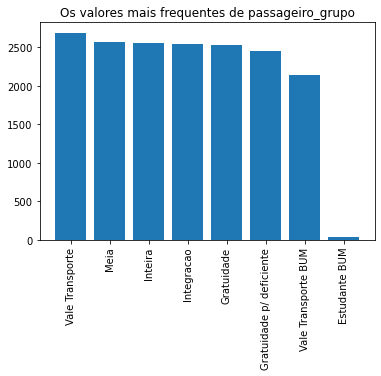

In [501]:
columns = ['fechamento_data', 'linha_numero', 'linha_nome', 'empresa_numero', 'empresa_nome', 'passageiro_grupo']

for i in columns:
  fig, ax = plt.subplots()
  if (i == 'linha_numero') | (i == 'linha_nome'):
    ax.bar(fgr[i].value_counts().index[:20].map(str), fgr[i].value_counts().values[:20], align='center')
    ttl = ax.set_title(f'Os valores 20 mais frequentes de {i}')
  else:
    ax.bar(fgr[i].value_counts().index[::].map(str), fgr[i].value_counts().values[::], align='center')
    ttl = ax.set_title(f'Os valores mais frequentes de {i}')
  ttl.set_position([.5, 1.05])
  plt.xticks(rotation=90)
  plt.plot()

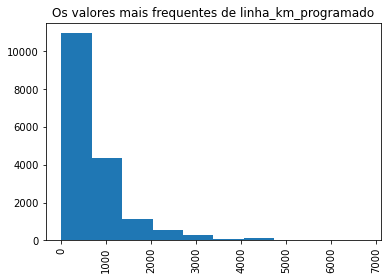

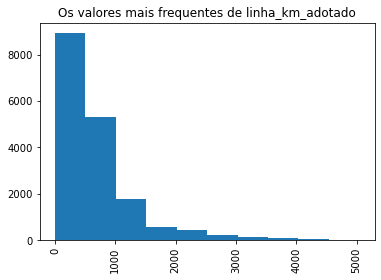

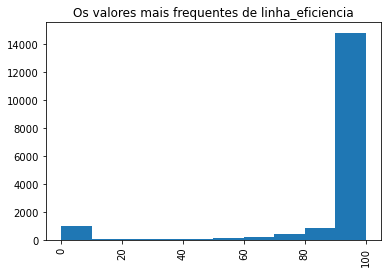

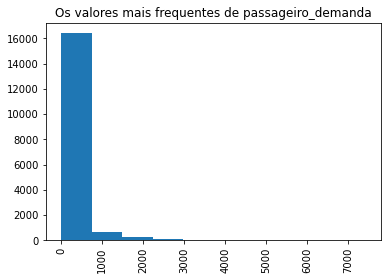

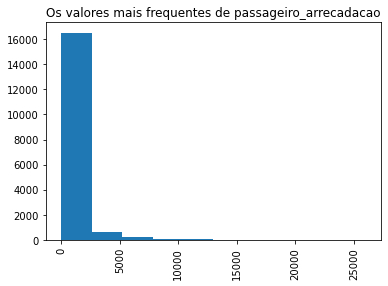

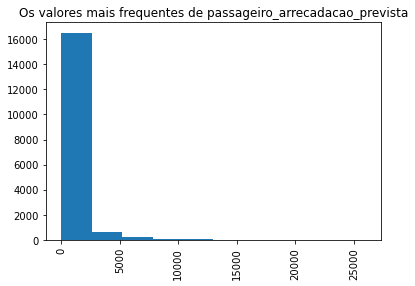

In [502]:
columns = fgr.drop(columns=columns).columns.to_list()
n_bins = 10

for i in columns:
    fig, ax = plt.subplots()
    ax.hist(fgr[i], n_bins)
    ttl = ax.set_title(f'Os valores mais frequentes de {i}')
    ttl.set_position([.5, 1.05])
    plt.xticks(rotation=90)
    plt.plot()

## V

In [503]:
v.columns

Index(['movimentos_data_arq', 'movimento_diario_data_mov', 'categoria_tipo',
       'empresa_codigo', 'empresa_modalidade', 'veiculo_numero',
       'veiculo_validador', 'linha_numero', 'linha_jornada',
       'linha_num_operador', 'linha_tabela', 'linha_hora_abertura',
       'linha_hora_fechamento', 'viagem_data_hora_abertura',
       'viagem_data_hora_fechamento', 'viagem_catraca_inicio',
       'viagem_catraca_final', 'viagem_sentido', 'viagem_ponto_abertura',
       'viagem_ponto_fechamento', 'passageiro_data_hora',
       'passageiro_integracao_bum', 'passageiro_valor_subsidio',
       'passageiro_evento', 'passageiro_sigben', 'passageiro_integracao',
       'passageiro_valor_pago', 'passageiro_tipo', 'passageiro_matricula',
       'passageiro_valor_repasse_metro', 'passageiro_hora_entrada'],
      dtype='object')

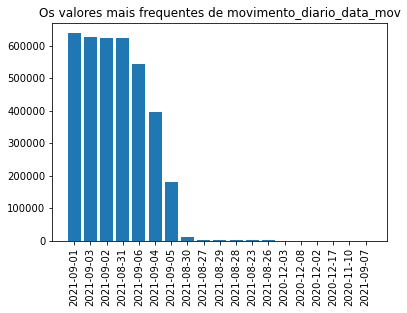

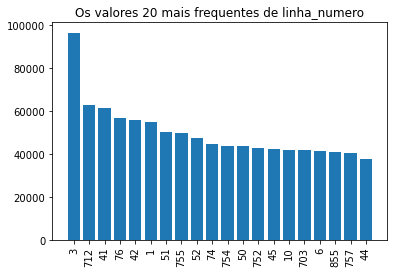

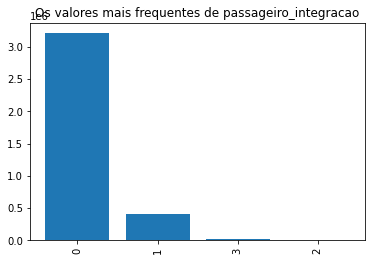

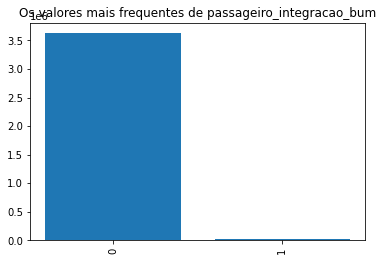

In [504]:
columns = ['movimento_diario_data_mov', 'linha_numero', 'passageiro_integracao', 'passageiro_integracao_bum']

for i in columns:
  fig, ax = plt.subplots()
  if (i == 'linha_numero') | (i == 'linha_nome'):
    ax.bar(v[i].value_counts().index[:20].map(str), v[i].value_counts().values[:20], align='center')
    ttl = ax.set_title(f'Os valores 20 mais frequentes de {i}')
  else:
    ax.bar(v[i].value_counts().index[::].map(str), v[i].value_counts().values[::], align='center')
    ttl = ax.set_title(f'Os valores mais frequentes de {i}')
  ttl.set_position([.5, 1.05])
  plt.xticks(rotation=90)
  plt.plot()

## dados_bairros

In [505]:
dados_bairros.columns

Index(['Bairros', 'IDH em 2010[8]', 'populaçao em 2020'], dtype='object')

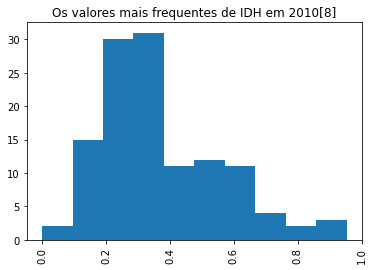

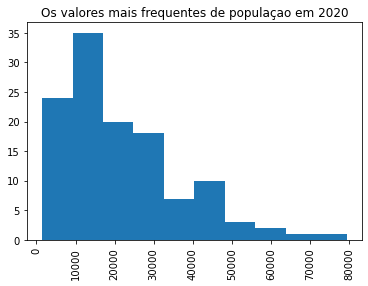

In [506]:
columns = ['IDH em 2010[8]', 'populaçao em 2020']
n_bins = 10

for i in columns:
    fig, ax = plt.subplots()
    ax.hist(dados_bairros[i], n_bins)
    ttl = ax.set_title(f'Os valores mais frequentes de {i}')
    ttl.set_position([.5, 1.05])
    plt.xticks(rotation=90)
    plt.plot()

# Validação Hipótese

## 1) O tamanho do trajeto se correlaciona positivamente com a demanda.

In [507]:
fgr.head()

fechamento_data  empresa_numero                empresa_nome  linha_numero  \
0      2021-09-01               2  Auto Viação Fortaleza Ltda             4   
1      2021-09-01               2  Auto Viação Fortaleza Ltda             4   
2      2021-09-01               2  Auto Viação Fortaleza Ltda             4   
3      2021-09-01               2  Auto Viação Fortaleza Ltda             4   
4      2021-09-01               2  Auto Viação Fortaleza Ltda             4   

                    linha_nome  linha_km_programado  linha_km_adotado  \
0  Messejana/Papicu/Cambeba/TJ              1165.12           1147.14   
1  Messejana/Papicu/Cambeba/TJ              1165.12           1147.14   
2  Messejana/Papicu/Cambeba/TJ              1165.12           1147.14   
3  Messejana/Papicu/Cambeba/TJ              1165.12           1147.14   
4  Messejana/Papicu/Cambeba/TJ              1165.12           1147.14   

   linha_eficiencia          passageiro_grupo  passageiro_demanda  \
0             98.46       Vale Transporte BUM                  14   
1             98.46                Gratuidade                  27   
2             98.46           Vale Transporte                1636   
3             98.46  Gratuidade p/ deficiente                 140   
4             98.46                      Meia                 193   

   passageiro_arrecadacao  passageiro_arrecadacao_prevista  
0                    47.2                             49.2  
1                     0.0                              0.0  
2                  5654.4                           5654.4  
3                     0.0                              0.0  
4                   298.0                            298.0

In [508]:
linha_p_km_programado = fgr[["fechamento_data", "linha_numero", "linha_km_programado"]].drop_duplicates()

In [509]:
linha_p_km_programado = linha_p_km_programado[linha_p_km_programado.linha_km_programado != 0]

In [510]:
linha_demanda_km = demanda_p_linha_dia.merge(
    linha_p_km_programado, how="inner", 
    left_on=["linha_numero", "movimento_diario_data_mov"], 
    right_on=["linha_numero","fechamento_data"]
)
linha_demanda_km.drop(columns=["fechamento_data"], inplace=True)
linha_demanda_km = linha_demanda_km.groupby(["linha_numero", "movimento_diario_data_mov"]).mean()

In [511]:
linha_demanda_km.reset_index().head()

linha_numero movimento_diario_data_mov  demanda_do_dia  linha_km_programado
0             4                2021-09-01            2410              1165.12
1             4                2021-09-02            2228              1165.12
2             4                2021-09-03            2291              1165.12
3             4                2021-09-06            1832              1165.12
4            11                2021-09-01            1567               578.16

<AxesSubplot:>

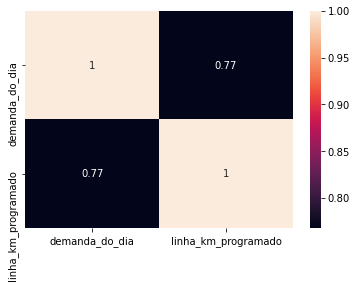

In [512]:
sb.heatmap(linha_demanda_km.corr(), annot=True)

#### Conclusão: O tamanho do trajeto se correlaciona positivamente com a demanda.

## 2) O tipo de passagem mais utilizada na linha influencia na demanda da mesma.

In [513]:
fgr.groupby(["linha_numero", "fechamento_data"]).max()["passageiro_grupo"].to_frame().reset_index().passageiro_grupo.value_counts()

Vale Transporte BUM    1670
Vale Transporte         304
Gratuidade                8
Name: passageiro_grupo, dtype: int64

In [514]:
linhas_max_tip_passageiro = fgr.groupby(["linha_numero", "fechamento_data"]).max()["passageiro_grupo"].to_frame().reset_index()

In [515]:
linha_demanda_tip_passageiro = demanda_p_linha_dia.merge(linhas_max_tip_passageiro, how="inner", left_on=["linha_numero", "movimento_diario_data_mov"], right_on=["linha_numero","fechamento_data"])
linha_demanda_tip_passageiro.drop(columns=["fechamento_data"], inplace = True)
linha_demanda_tip_passageiro.rename(columns={"passageiro_grupo": "tip_pass_mais_freq"}, inplace = True)

In [516]:
linha_demanda_tip_passageiro.head()

linha_numero movimento_diario_data_mov  demanda_do_dia   tip_pass_mais_freq
0             1                2021-09-01            8888  Vale Transporte BUM
1             1                2021-09-02            8244  Vale Transporte BUM
2             1                2021-09-03            9020  Vale Transporte BUM
3             1                2021-09-04            6572  Vale Transporte BUM
4             1                2021-09-05            4167  Vale Transporte BUM

In [517]:
linha_demanda_tip_passageiro.describe()

linha_numero  demanda_do_dia
count   1730.000000     1730.000000
mean     382.506936     1736.750867
std      262.673196     1982.421598
min        1.000000        1.000000
25%      108.000000      502.000000
50%      357.000000     1070.000000
75%      631.000000     2095.250000
max      999.000000    15203.000000

Para remover os outliers de demanda_do_dia pelo intervalo interquaril, fazemos o seguinte calculo:

(2095 - 502)*1.5 + 2095 = Limite Superior = 4485

In [518]:
linha_demanda_tip_passageiro.query("demanda_do_dia <= 4485", inplace=True)

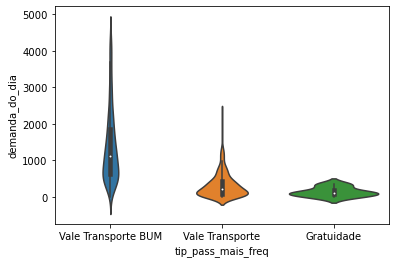

In [519]:
sb.violinplot(data=linha_demanda_tip_passageiro, x="tip_pass_mais_freq", y="demanda_do_dia");

#### Conclusão: Devido ao desbalanceamento, não podemos considerar o tipo de passageiro mais frequente como algo que se correlaciona com a demanda.

## 3) A demanda é maior entre os horários de 06h às 09h e 17h às 19h em comparação aos outros.

In [520]:
v.head()

movimentos_data_arq movimento_diario_data_mov  categoria_tipo  \
0          2021-09-01                2021-08-26               1   
1          2021-09-01                2021-08-26               1   
2          2021-09-01                2021-08-26               1   
3          2021-09-01                2021-08-26               1   
4          2021-09-01                2021-08-26               1   

   empresa_codigo  empresa_modalidade  veiculo_numero veiculo_validador  \
0              42                   1           42717              860E   
1              42                   1           42717              860E   
2              42                   1           42717              860E   
3              42                   1           42717              860E   
4              42                   1           42717              860E   

   linha_numero  linha_jornada  linha_num_operador  ...  \
0           633              1              196769  ...   
1           633              1              196769  ...   
2           633              1              196769  ...   
3           633              1              196769  ...   
4           633              1              196769  ...   

   passageiro_integracao_bum passageiro_valor_subsidio passageiro_evento  \
0                          0                         0        4219114872   
1                          0                         0        4219114873   
2                          0                         0        4219114874   
3                          0                         0        4219114875   
4                          0                         0        4219114876   

  passageiro_sigben passageiro_integracao  passageiro_valor_pago  \
0                 0                     0                    3.6   
1                 0                     0                    3.6   
2                 0                     0                    3.6   
3                 0                     0                    3.6   
4                 0                     0                    3.6   

   passageiro_tipo  passageiro_matricula  passageiro_valor_repasse_metro  \
0                4               7308696                             0.0   
1                4               6423497                             0.0   
2               12               5063339                             0.0   
3                4               4792159                             0.0   
4                4               3125993                             0.0   

   passageiro_hora_entrada  
0                        5  
1                        5  
2                        5  
3                        5  
4                        5  

[5 rows x 31 columns]

<AxesSubplot:>

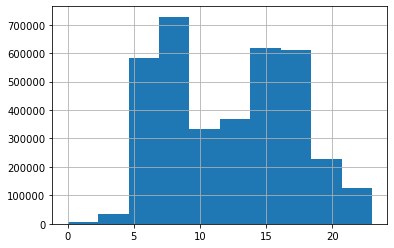

In [521]:
v["passageiro_hora_entrada"].hist()

In [522]:
v.passageiro_data_hora.describe()

<ipython-input-522-2bfefab4412d>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                 3641303
unique                 486947
top       2021-09-02 06:25:39
freq                       38
first     2020-11-10 06:47:59
last      2021-09-07 01:03:11
Name: passageiro_data_hora, dtype: object

In [523]:
v["passageiro_data_hora"].head()

0   2021-08-26 05:37:51
1   2021-08-26 05:40:11
2   2021-08-26 05:40:16
3   2021-08-26 05:41:06
4   2021-08-26 05:42:21
Name: passageiro_data_hora, dtype: datetime64[ns]

In [524]:
v["passageiro_hora_entrada"] = v["passageiro_data_hora"].dt.hour

<AxesSubplot:>

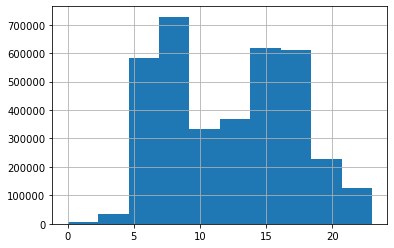

In [525]:
v["passageiro_hora_entrada"].hist()

Agrupando os horarios em ranges:

In [526]:
v["passageiro_hora_range"] = pd.cut(v["passageiro_hora_entrada"], bins=[-1, 4, 6, 9, 12, 15, 18, 21, float('Inf')], labels=['00-3h59', '4-5h59', '6-8h59', '9-11h59', '12-14h59', '15-17h59', '18-20h59', '21-23h59'])

In [527]:
v["passageiro_hora_range"].value_counts()

15-17h59    869222
6-8h59      728089
4-5h59      584428
12-14h59    534716
9-11h59     527937
18-20h59    285469
21-23h59     69756
00-3h59      41686
Name: passageiro_hora_range, dtype: int64

In [528]:
v["passageiro_hora_range"].isnull().sum()

0

In [529]:
v.head()

movimentos_data_arq movimento_diario_data_mov  categoria_tipo  \
0          2021-09-01                2021-08-26               1   
1          2021-09-01                2021-08-26               1   
2          2021-09-01                2021-08-26               1   
3          2021-09-01                2021-08-26               1   
4          2021-09-01                2021-08-26               1   

   empresa_codigo  empresa_modalidade  veiculo_numero veiculo_validador  \
0              42                   1           42717              860E   
1              42                   1           42717              860E   
2              42                   1           42717              860E   
3              42                   1           42717              860E   
4              42                   1           42717              860E   

   linha_numero  linha_jornada  linha_num_operador  ...  \
0           633              1              196769  ...   
1           633              1              196769  ...   
2           633              1              196769  ...   
3           633              1              196769  ...   
4           633              1              196769  ...   

   passageiro_valor_subsidio passageiro_evento passageiro_sigben  \
0                          0        4219114872                 0   
1                          0        4219114873                 0   
2                          0        4219114874                 0   
3                          0        4219114875                 0   
4                          0        4219114876                 0   

  passageiro_integracao passageiro_valor_pago  passageiro_tipo  \
0                     0                   3.6                4   
1                     0                   3.6                4   
2                     0                   3.6               12   
3                     0                   3.6                4   
4                     0                   3.6                4   

   passageiro_matricula  passageiro_valor_repasse_metro  \
0               7308696                             0.0   
1               6423497                             0.0   
2               5063339                             0.0   
3               4792159                             0.0   
4               3125993                             0.0   

   passageiro_hora_entrada  passageiro_hora_range  
0                        5                 4-5h59  
1                        5                 4-5h59  
2                        5                 4-5h59  
3                        5                 4-5h59  
4                        5                 4-5h59  

[5 rows x 32 columns]

### Correlação com horário datetime

In [530]:
v_hora = v.groupby(["linha_numero", "movimento_diario_data_mov"]).mean()["passageiro_hora_entrada"].to_frame().reset_index()
v_hora_demanda = v.groupby(["linha_numero", "movimento_diario_data_mov"]).count()["passageiro_matricula"].to_frame().reset_index()

v_hora_demanda = v_hora.merge(v_hora_demanda, how="inner", on=["linha_numero", "movimento_diario_data_mov"])

In [531]:
v_hora_demanda.head()

linha_numero movimento_diario_data_mov  passageiro_hora_entrada  \
0             1                2021-08-29                10.275862   
1             1                2021-08-31                11.799802   
2             1                2021-09-01                11.599797   
3             1                2021-09-02                11.672853   
4             1                2021-09-03                11.835698   

   passageiro_matricula  
0                   232  
1                  9096  
2                  8888  
3                  8244  
4                  9020

<AxesSubplot:>

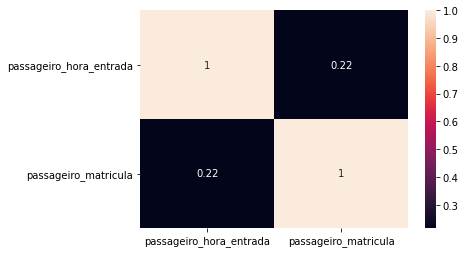

In [532]:
sb.heatmap(v_hora_demanda.drop(columns=["linha_numero", "movimento_diario_data_mov"]).corr(), annot=True)

### Correlação com horário segmentado

In [533]:
v_hora_range = v.groupby(["linha_numero", "movimento_diario_data_mov", "passageiro_hora_range"]).count()["passageiro_matricula"].to_frame().reset_index()

In [534]:
v_hora_range.dropna(inplace=True)

In [535]:
v_hora_range.head()

linha_numero movimento_diario_data_mov passageiro_hora_range  \
0             1                2020-11-10               00-3h59   
1             1                2020-11-10                4-5h59   
2             1                2020-11-10                6-8h59   
3             1                2020-11-10               9-11h59   
4             1                2020-11-10              12-14h59   

   passageiro_matricula  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [536]:
import plotly.express as px

fig = px.violin(v_hora_range, y="passageiro_matricula", x="passageiro_hora_range", box=True,
          hover_data=v_hora_range.columns)
fig.show()

**00h - 3h59**

75%  das rotas tiverem até  43 pessoas

25%  das rotas tiverem até  5 pessoas

---
**4h-5h59**

75%  das rotas tiverem até  415 pessoas

25%  das rotas tiverem até  100 pessoas

---
**06h - 8h59**

75%  das rotas tiverem até  451 pessoas

25%  das rotas tiverem até  126 pessoas

---
**09h - 11h59**

75%  das rotas tiverem até  342 pessoas

25%  das rotas tiverem até  96 pessoas

---
**12h - 14h59**

75%  das rotas tiverem até  332 pessoas

25%  das rotas tiverem até  76 pessoas

---
**15h - 17h59**

75%  das rotas tiverem até  516 pessoas

25%  das rotas tiverem até  112 pessoas

---
**18 - 20h59**

75%  das rotas tiverem até  164 pessoas

25%  das rotas tiverem até  33 pessoas

---
**21 - 23h59**

75%  das rotas tiverem até  40 pessoas

25%  das rotas tiverem até  7 pessoas



In [537]:
v_hora_range_dummies = pd.get_dummies(v_hora_range["passageiro_hora_range"])

In [538]:
v_hora_range = pd.concat([v_hora_range, v_hora_range_dummies], axis=1)

In [539]:
v_hora_range.head(20)

linha_numero movimento_diario_data_mov passageiro_hora_range  \
0              1                2020-11-10               00-3h59   
1              1                2020-11-10                4-5h59   
2              1                2020-11-10                6-8h59   
3              1                2020-11-10               9-11h59   
4              1                2020-11-10              12-14h59   
5              1                2020-11-10              15-17h59   
6              1                2020-11-10              18-20h59   
7              1                2020-11-10              21-23h59   
8              1                2020-12-02               00-3h59   
9              1                2020-12-02                4-5h59   
10             1                2020-12-02                6-8h59   
11             1                2020-12-02               9-11h59   
12             1                2020-12-02              12-14h59   
13             1                2020-12-02              15-17h59   
14             1                2020-12-02              18-20h59   
15             1                2020-12-02              21-23h59   
16             1                2020-12-03               00-3h59   
17             1                2020-12-03                4-5h59   
18             1                2020-12-03                6-8h59   
19             1                2020-12-03               9-11h59   

    passageiro_matricula  00-3h59  4-5h59  6-8h59  9-11h59  12-14h59  \
0                      0        1       0       0        0         0   
1                      0        0       1       0        0         0   
2                      0        0       0       1        0         0   
3                      0        0       0       0        1         0   
4                      0        0       0       0        0         1   
5                      0        0       0       0        0         0   
6                      0        0       0       0        0         0   
7                      0        0       0       0        0         0   
8                      0        1       0       0        0         0   
9                      0        0       1       0        0         0   
10                     0        0       0       1        0         0   
11                     0        0       0       0        1         0   
12                     0        0       0       0        0         1   
13                     0        0       0       0        0         0   
14                     0        0       0       0        0         0   
15                     0        0       0       0        0         0   
16                     0        1       0       0        0         0   
17                     0        0       1       0        0         0   
18                     0        0       0       1        0         0   
19                     0        0       0       0        1         0   

    15-17h59  18-20h59  21-23h59  
0          0         0         0  
1          0         0         0  
2          0         0         0  
3          0         0         0  
4          0         0         0  
5          1         0         0  
6          0         1         0  
7          0         0         1  
8          0         0         0  
9          0         0         0  
10         0         0         0  
11         0         0         0  
12         0         0         0  
13         1         0         0  
14         0         1         0  
15         0         0         1  
16         0         0         0  
17         0         0         0  
18         0         0         0  
19         0         0         0

<AxesSubplot:>

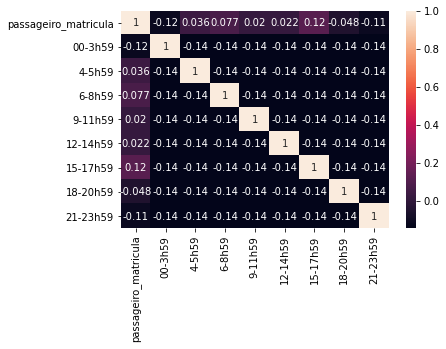

In [540]:
sb.heatmap(v_hora_range.drop(columns=["linha_numero"]).corr(), annot=True)

#### Conclusão
Existe uma certa correlação entre horário e a demanda. Notamos que horário entre 06h - 8h59 e 15h - 17h59 possuem uma demanda maior do que os outros horários. As menores demandas se encontram em horário noturno (após as 18h).

Existe uma certa demanda pela madrugada, provavelmente pelas pessoas que moram na região metropolitana ou muito distante de onde trabalham (o que necessita estas pegarem onibus mais cedo).

## 4) O IDH / População dos bairros em que a linha se correlaciona com a demanda da mesma.

### Conectando info de bairros

In [541]:
rota_paradas_merged = rota_paradas.merge(paradas, how="inner", on="stop_id")
rota_paradas_merged = rota_paradas_merged.merge(rotas, how="inner", on="route_id")

In [542]:
#Retirando colunad desnecessaria
rotas_paradas_clean = rota_paradas_merged[["route_id", "stop_sequence", "district", "city"]]

In [543]:
rotas_paradas_clean.head()

route_id  stop_sequence     district       city
0        11              1       Centro  Fortaleza
1        11              2       Centro  Fortaleza
2        11              3       Centro  Fortaleza
3        11              4  Jacarecanga  Fortaleza
4        11              5       Centro  Fortaleza

In [544]:
rotas_paradas_clean.district.value_counts()

Centro                        383
Messejana                     336
Parangaba                     295
Barra do Ceará                225
Fátima                        202
                             ... 
Urucutuba                       4
Industrial                      3
Ellery                          2
Cararu                          2
Rodovia Estrada do Guarani      1
Name: district, Length: 130, dtype: int64

In [545]:
rotas_paradas_demanda = rotas_paradas_clean.merge(demanda_p_linha_dia, how="inner", left_on="route_id", right_on="linha_numero")

In [546]:
rotas_paradas_demanda.drop(columns=["route_id", "stop_sequence"], inplace=True)

In [547]:
rotas_paradas_demanda.head()

district       city  linha_numero movimento_diario_data_mov  demanda_do_dia
0   Centro  Fortaleza            11                2021-08-31            1561
1   Centro  Fortaleza            11                2021-09-01            1567
2   Centro  Fortaleza            11                2021-09-02            1683
3   Centro  Fortaleza            11                2021-09-03            1739
4   Centro  Fortaleza            11                2021-09-04             814

In [548]:
rotas_paradas_demanda = rotas_paradas_demanda[rotas_paradas_demanda["city"] == "Fortaleza"]

In [549]:
rotas_paradas_demanda.head()

district       city  linha_numero movimento_diario_data_mov  demanda_do_dia
0   Centro  Fortaleza            11                2021-08-31            1561
1   Centro  Fortaleza            11                2021-09-01            1567
2   Centro  Fortaleza            11                2021-09-02            1683
3   Centro  Fortaleza            11                2021-09-03            1739
4   Centro  Fortaleza            11                2021-09-04             814

In [550]:
rotas_paradas_demanda.district.unique()

array(['Centro', 'Jacarecanga', 'Farias Brito', 'Benfica', 'Fátima',
       'São João do Tauape', 'Dionísio Torres', 'Aldeota', 'Papicu',
       'Varjota', 'Meireles', 'Carlito Pamplona', 'Barra do Ceará',
       'Álvaro Weyne', 'Floresta', 'Vila Velha', 'Jardim Guanabara',
       'Olavo Oliveira', 'Antônio Bezerra', 'Padre Andrade',
       'Conjunto Ceará I', 'Genibaú', 'Autran Nunes', 'Dom Lustosa',
       'Henrique Jorge', 'Jóquei Clube', 'Demócrito Rocha',
       'Couto Fernandes', 'Bela Vista', 'Rodolfo Teófilo',
       'Cristo Redentor', 'Granja Lisboa', 'Conjunto Ceará II', 'Pirambu',
       'Cocó', 'Presidente Kennedy', 'Cidade 2000',
       'Engenheiro Luciano Cavalcante', 'Salinas', 'Guararapes',
       'José Bonifácio', 'Săo Gerardo', 'Monte Castelo', 'Joaquim Távora',
       'Edson Queiroz', 'Pici', 'Amadeu Furtado', 'Parquelândia',
       'Parque Araxá', 'Parreão', 'Vila Uniăo', 'Parque Manibura',
       'José de Alencar', 'Lagoa Redonda', 'Curió', 'Cambeba', 'Guajeru',
  

### Resolvendo problemas de merge entre dados_bairro e rotas_paradas_demanda

In [551]:
# Retira acentos e barras (/ + termo) dos nomes dos bairros
district = []
for index, row in rotas_paradas_demanda.iterrows():
  district_without_punt = unidecode(row["district"])
  district_without_barra = district_without_punt.split("/")[0]
  if district_without_barra.startswith("Parque "):
    district_without_barra = district_without_barra.replace("Parque ", "")
  if district_without_barra.startswith("Vila "):
    district_without_barra = district_without_barra.replace("Vila ", "")
  if district_without_barra.startswith("Prefeito "):
    district_without_barra = district_without_barra.replace("Prefeito ", "")
  district.append(district_without_barra.strip())
rotas_paradas_demanda["Bairro"] = district

district = []
for index, row in dados_bairros.iterrows():
  district_without_punt = unidecode(row["Bairros"])
  district_without_barra = district_without_punt.split("/")[0]
  if district_without_barra.startswith("Parque "):
    district_without_barra = district_without_barra.replace("Parque ", "")
  if district_without_barra.startswith("Vila "):
    district_without_barra = district_without_barra.replace("Vila ", "")
  if district_without_barra.startswith("Prefeito "):
    district_without_barra = district_without_barra.replace("Prefeito ", "")
  district.append(district_without_barra.strip())
dados_bairros["Bairro"] = district

In [552]:
dados_bairros["Bairro"].sort_values().unique()

array(['Aerolandia', 'Aeroporto', 'Aldeota', 'Alto da Balanca',
       'Alvaro Weyne', 'Amadeu Furtado', 'Ancuri', 'Antonio Bezerra',
       'Aracape', 'Araxa', 'Autran Nunes', 'Barra do Ceara', 'Barroso',
       'Bela Vista', 'Benfica', 'Boa Vista', 'Bom Futuro', 'Bom Jardim',
       'Bonsucesso', 'Cais do Porto', 'Cajazeiras', 'Cambeba',
       'Canindezinho', 'Carlito Pamplona', 'Centro', 'Cidade 2000',
       'Cidade dos Funcionarios', 'Coacu', 'Coco', 'Conjunto Ceara I',
       'Conjunto Ceara II', 'Conjunto Esperanca', 'Conjunto Palmeiras',
       'Couto Fernandes', 'Cristo Redentor', 'Curio', 'Damas',
       'De Lourdes', 'Democrito Rocha', 'Dende', 'Dias Macedo',
       'Dionisio Torres', 'Dois Irmaos', 'Dom Lustosa', 'Edson Queiroz',
       'Ellery', 'Engenheiro Luciano Cavalcante', 'Farias Brito',
       'Fatima', 'Floresta', 'Genibau', 'Granja Lisboa',
       'Granja Portugal', 'Guajeru', 'Guararapes', 'Henrique Jorge',
       'Iracema', 'Itaoca', 'Itaperi', 'Jacarecanga', '

In [553]:
rotas_paradas_demanda["Bairro"] = rotas_paradas_demanda["Bairro"].str.lower()
rotas_paradas_demanda["Bairro"] = rotas_paradas_demanda["Bairro"].str.replace("ç", "c")
dados_bairros["Bairro"] = dados_bairros["Bairro"].str.lower()

In [554]:
rotas_paradas_demanda.Bairro.unique()

array(['centro', 'jacarecanga', 'farias brito', 'benfica', 'fatima',
       'sao joao do tauape', 'dionisio torres', 'aldeota', 'papicu',
       'varjota', 'meireles', 'carlito pamplona', 'barra do ceara',
       'alvaro weyne', 'floresta', 'velha', 'jardim guanabara',
       'olavo oliveira', 'antonio bezerra', 'padre andrade',
       'conjunto ceara i', 'genibau', 'autran nunes', 'dom lustosa',
       'henrique jorge', 'joquei clube', 'democrito rocha',
       'couto fernandes', 'bela vista', 'rodolfo teofilo',
       'cristo redentor', 'granja lisboa', 'conjunto ceara ii', 'pirambu',
       'coco', 'presidente kennedy', 'cidade 2000',
       'engenheiro luciano cavalcante', 'salinas', 'guararapes',
       'jose bonifacio', 'sao gerardo', 'monte castelo', 'joaquim tavora',
       'edson queiroz', 'pici', 'amadeu furtado', 'parquelandia', 'araxa',
       'parreao', 'uniao', 'manibura', 'jose de alencar', 'lagoa redonda',
       'curio', 'cambeba', 'guajeru', 'parangaba', 'montese', 'd

In [555]:
dados_bairros.head()

Bairros  IDH em 2010[8]  populaçao em 2020           Bairro
0       Aerolandia           0.311              12445       aerolandia
1        Aeroporto           0.177               9442        aeroporto
2          Aldeota           0.867              46411          aldeota
3  Alto da Balança           0.347              14039  alto da balanca
4     Alvaro Weyne           0.365              25955     alvaro weyne

In [556]:
rotas_demanda_bairro = rotas_paradas_demanda.merge(dados_bairros, how="inner", left_on="Bairro", right_on="Bairro")

In [557]:
rotas_demanda_bairro.head()

district       city  linha_numero movimento_diario_data_mov  demanda_do_dia  \
0   Centro  Fortaleza            11                2021-08-31            1561   
1   Centro  Fortaleza            11                2021-09-01            1567   
2   Centro  Fortaleza            11                2021-09-02            1683   
3   Centro  Fortaleza            11                2021-09-03            1739   
4   Centro  Fortaleza            11                2021-09-04             814   

   Bairro Bairros  IDH em 2010[8]  populaçao em 2020  
0  centro  Centro           0.557              31268  
1  centro  Centro           0.557              31268  
2  centro  Centro           0.557              31268  
3  centro  Centro           0.557              31268  
4  centro  Centro           0.557              31268

### Verificando a hipótese

In [558]:
rotas_demanda_bairro.groupby(["linha_numero"]).mean()[["demanda_do_dia", "IDH em 2010[8]"]].corr()

demanda_do_dia  IDH em 2010[8]
demanda_do_dia        1.000000        0.246655
IDH em 2010[8]        0.246655        1.000000

In [559]:
rotas_demanda_bairro.groupby(["linha_numero"]).mean()[["demanda_do_dia", "populaçao em 2020"]].corr()

demanda_do_dia  populaçao em 2020
demanda_do_dia           1.000000           0.107566
populaçao em 2020        0.107566           1.000000

In [560]:
rotas_demanda_bairro.head()

district       city  linha_numero movimento_diario_data_mov  demanda_do_dia  \
0   Centro  Fortaleza            11                2021-08-31            1561   
1   Centro  Fortaleza            11                2021-09-01            1567   
2   Centro  Fortaleza            11                2021-09-02            1683   
3   Centro  Fortaleza            11                2021-09-03            1739   
4   Centro  Fortaleza            11                2021-09-04             814   

   Bairro Bairros  IDH em 2010[8]  populaçao em 2020  
0  centro  Centro           0.557              31268  
1  centro  Centro           0.557              31268  
2  centro  Centro           0.557              31268  
3  centro  Centro           0.557              31268  
4  centro  Centro           0.557              31268

In [561]:
rotas_demanda = rotas_demanda_bairro.groupby(["linha_numero"]).mean()[["demanda_do_dia"]].reset_index()

In [562]:
rotas_idh_max = rotas_demanda_bairro.groupby(["linha_numero"]).max()[["IDH em 2010[8]"]].reset_index()

In [563]:
rotas_demanda.merge(rotas_idh_max, how="inner").corr()

linha_numero  demanda_do_dia  IDH em 2010[8]
linha_numero        1.000000       -0.123162       -0.080735
demanda_do_dia     -0.123162        1.000000        0.468745
IDH em 2010[8]     -0.080735        0.468745        1.000000

Aparentemente, a média do IDH dos bairros em que a rota passa e o maior IDH por onde ele passa tem leve correlação positiva com a demanda.

In [564]:
dados_bairros.describe()

IDH em 2010[8]  populaçao em 2020
count      121.000000         121.000000
mean         0.372116       22203.363636
std          0.184099       15102.332438
min          0.000000        1470.000000
25%          0.243000       11744.000000
50%          0.338000       17533.000000
75%          0.491000       30237.000000
max          0.953000       79346.000000

## 5) Dias da semana afetam a demanda?

In [565]:
demanda_p_linha_dia.movimento_diario_data_mov = pd.to_datetime(demanda_p_linha_dia.movimento_diario_data_mov)

In [566]:
demanda_p_linha_dia["Dia_Semana"] = demanda_p_linha_dia.movimento_diario_data_mov.dt.weekday

In [567]:
days_week ={
    0: 'Segunda', 
    1: 'Terça', 
    2: 'Quarta', 
    3: 'Quinta', 
    4: 'Sexta',
    5: 'Sábado', 
    6: 'Domingo'
}

In [568]:
demanda_p_linha_dia.Dia_Semana = demanda_p_linha_dia.Dia_Semana.map(days_week)

In [569]:
demanda_semana_linha = demanda_p_linha_dia.groupby(["linha_numero", "Dia_Semana"]).mean()[["demanda_do_dia"]].reset_index()

In [570]:
demanda_semana_linha = pd.concat([demanda_semana_linha, pd.get_dummies(demanda_semana_linha["Dia_Semana"])], axis = 1)

In [571]:
demanda_semana_linha.head()

linha_numero Dia_Semana  demanda_do_dia  Domingo  Quarta  Quinta  Segunda  \
0             1    Domingo          2199.5        1       0       0        0   
1             1     Quarta          8888.0        0       1       0        0   
2             1     Quinta          8244.0        0       0       1        0   
3             1    Segunda          8765.0        0       0       0        1   
4             1      Sexta          9020.0        0       0       0        0   

   Sexta  Sábado  Terça  
0      0       0      0  
1      0       0      0  
2      0       0      0  
3      0       0      0  
4      1       0      0

In [572]:
demanda_semana_linha.drop(columns=["Dia_Semana"], inplace = True)

<AxesSubplot:>

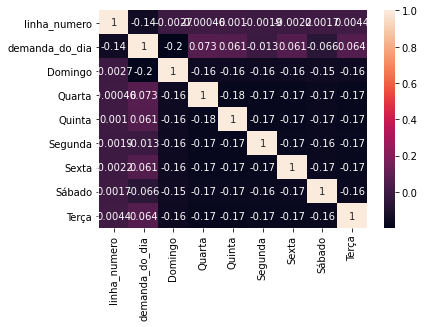

In [573]:
sb.heatmap(demanda_semana_linha.corr(), annot=True)

#### Conclusão: Aparentemente, apenas Domingo possui uma correlação consideravel com a demanda. Os outros dias não esboçam alguma correlação.

# Obsevando correlação e distribuição para uma base unificada

In [574]:
v_hora_range["movimento_diario_data_mov"] = pd.to_datetime(v_hora_range["movimento_diario_data_mov"])

days_week ={
    0: 'Segunda', 
    1: 'Terça', 
    2: 'Quarta', 
    3: 'Quinta', 
    4: 'Sexta',
    5: 'Sábado', 
    6: 'Domingo'
}

def eh_domingo(dia_semana):
    if dia_semana == "Domingo":
        return 1
    else:
        return 0

v_hora_range["Dia_Semana"] = v_hora_range.movimento_diario_data_mov.dt.weekday
v_hora_range["Dia_Semana"] = v_hora_range.Dia_Semana.map(days_week)
v_hora_range["Domingo"] = v_hora_range["Dia_Semana"].map(eh_domingo)

v_hora_range.head()

linha_numero movimento_diario_data_mov passageiro_hora_range  \
0             1                2020-11-10               00-3h59   
1             1                2020-11-10                4-5h59   
2             1                2020-11-10                6-8h59   
3             1                2020-11-10               9-11h59   
4             1                2020-11-10              12-14h59   

   passageiro_matricula  00-3h59  4-5h59  6-8h59  9-11h59  12-14h59  15-17h59  \
0                     0        1       0       0        0         0         0   
1                     0        0       1       0        0         0         0   
2                     0        0       0       1        0         0         0   
3                     0        0       0       0        1         0         0   
4                     0        0       0       0        0         1         0   

   18-20h59  21-23h59 Dia_Semana  Domingo  
0         0         0      Terça        0  
1         0         0      Terça        0  
2         0         0      Terça        0  
3         0         0      Terça        0  
4         0         0      Terça        0

In [575]:
linha_demanda_km = linha_demanda_km.reset_index()
linha_demanda_km.drop(columns=["movimento_diario_data_mov", "demanda_do_dia"], inplace=True)
linha_demanda_km = linha_demanda_km.groupby(["linha_numero"]).mean()[["linha_km_programado"]].reset_index()

dataset_model = v_hora_range.merge(linha_demanda_km, how="inner", on="linha_numero")
dataset_model.head()

linha_numero movimento_diario_data_mov passageiro_hora_range  \
0             4                2020-11-10               00-3h59   
1             4                2020-11-10                4-5h59   
2             4                2020-11-10                6-8h59   
3             4                2020-11-10               9-11h59   
4             4                2020-11-10              12-14h59   

   passageiro_matricula  00-3h59  4-5h59  6-8h59  9-11h59  12-14h59  15-17h59  \
0                     0        1       0       0        0         0         0   
1                     0        0       1       0        0         0         0   
2                     0        0       0       1        0         0         0   
3                     0        0       0       0        1         0         0   
4                     0        0       0       0        0         1         0   

   18-20h59  21-23h59 Dia_Semana  Domingo  linha_km_programado  
0         0         0      Terça        0              1165.12  
1         0         0      Terça        0              1165.12  
2         0         0      Terça        0              1165.12  
3         0         0      Terça        0              1165.12  
4         0         0      Terça        0              1165.12

In [576]:
dataset_model = dataset_model.merge(rotas_idh_max, how="inner", on="linha_numero")

In [577]:
dataset_model.drop(columns=["passageiro_hora_range"], inplace=True)
dataset_model.head()

linha_numero movimento_diario_data_mov  passageiro_matricula  00-3h59  \
0             4                2020-11-10                     0        1   
1             4                2020-11-10                     0        0   
2             4                2020-11-10                     0        0   
3             4                2020-11-10                     0        0   
4             4                2020-11-10                     0        0   

   4-5h59  6-8h59  9-11h59  12-14h59  15-17h59  18-20h59  21-23h59 Dia_Semana  \
0       0       0        0         0         0         0         0      Terça   
1       1       0        0         0         0         0         0      Terça   
2       0       1        0         0         0         0         0      Terça   
3       0       0        1         0         0         0         0      Terça   
4       0       0        0         1         0         0         0      Terça   

   Domingo  linha_km_programado  IDH em 2010[8]  
0        0              1165.12           0.762  
1        0              1165.12           0.762  
2        0              1165.12           0.762  
3        0              1165.12           0.762  
4        0              1165.12           0.762

In [578]:
dataset_model.rename(columns={"passageiro_hora_range": "hora_range", 
                              "passageiro_matricula": "demanda",
                              "linha_km_programado": "linha_km",
                              "IDH em 2010[8]_y": "idh_max"}, inplace=True)

In [579]:
dataset_model['demanda'] = dataset_model['demanda'].replace(0, np.nan)

In [580]:
dataset_model.dropna(inplace=True)

In [581]:
dataset_model.drop_duplicates(inplace=True)

(13.5, -0.5)

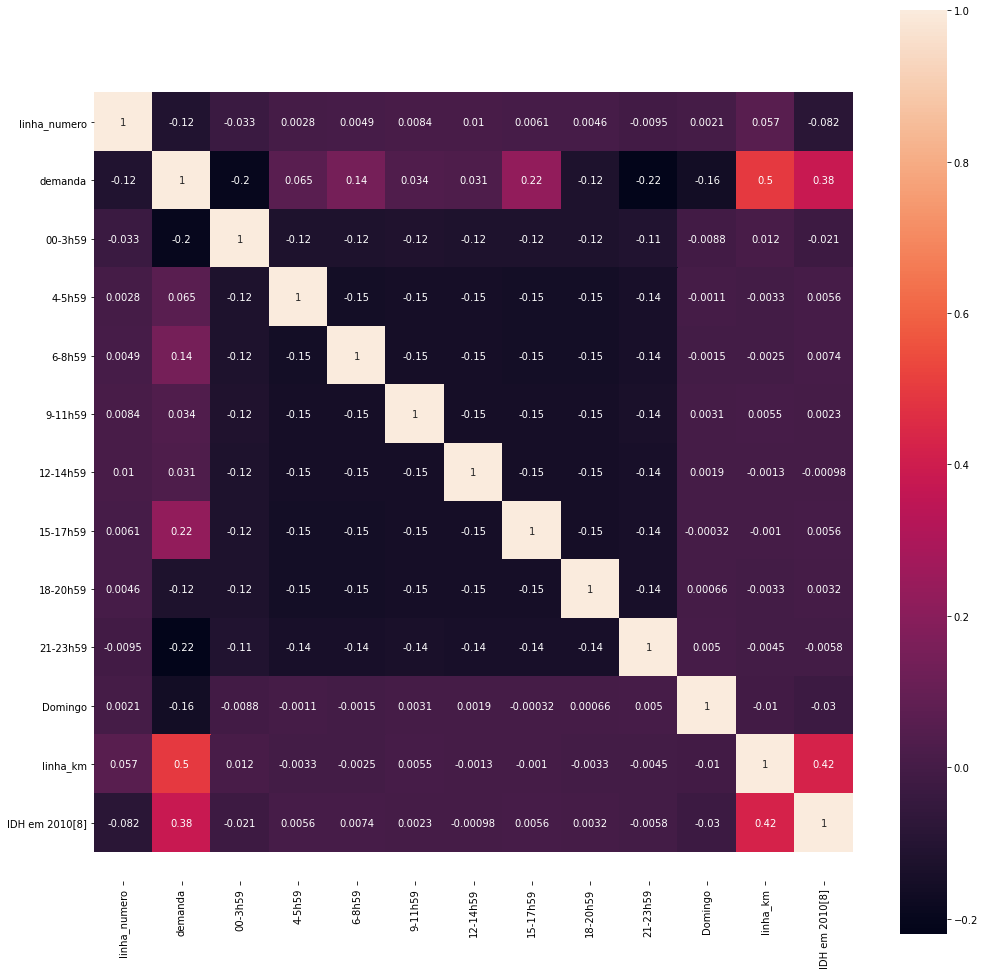

In [582]:
corrMatrix = dataset_model.corr()
f, ax = plt.subplots(figsize=(17, 17))
ax = sb.heatmap(corrMatrix, annot=True, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

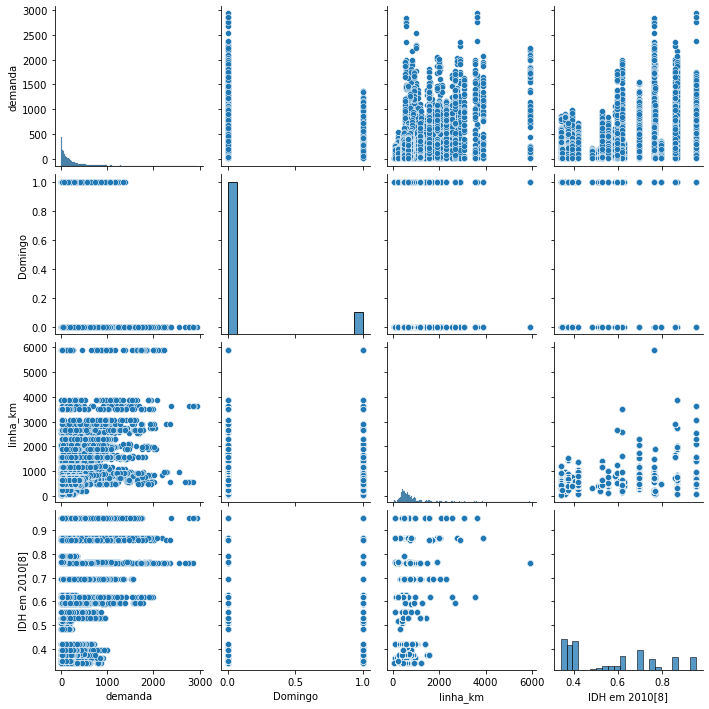

In [583]:
sb.pairplot(dataset_model[['demanda', 'Domingo', 'linha_km', 'IDH em 2010[8]']])